<a href="https://colab.research.google.com/github/Vicheka6363/Vicheka_ITE_G8A_PP/blob/main/TestinProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importin Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Test Set Image Processing

In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits-360-original-size/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3110 files belonging to 24 classes.


#Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

#Visualising and Performing Prediction on Single image

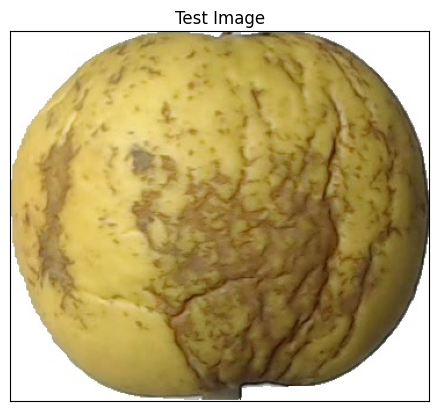

In [13]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/fruits-360-original-size/Test/apple_golden_1/r0_103.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 51ms/step


In [15]:
print(predictions)

[[6.5923440e-11 1.1472460e-11 2.3636815e-12 9.9999881e-01 1.1533659e-06
  1.6299886e-09 6.7069883e-10 4.6297639e-11 6.3328884e-09 2.5649840e-08
  1.1934035e-09 6.5998601e-13 6.3755792e-11 6.9398265e-09 2.9367773e-12
  1.8327622e-11 4.9907409e-12 1.4694181e-13 2.3415503e-12 2.1248476e-13
  1.3647454e-10 1.5603873e-14 8.6299522e-13 3.6272019e-13]]


In [16]:
# test_set.class_names
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


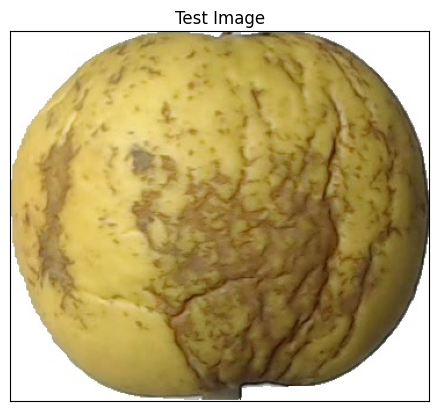

In [17]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a apple_golden_1
